In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings("ignore")

In [46]:
df=pd.read_csv('Chicago_Data/RT_Data_vTEST.csv',index_col=0)
df.rename(columns={'Reponder':'Responder'},inplace=True)
df.head()

,Mean,Median,Max,Officers Maxed,RTs,Tot. Officer Demand,District Officer Demand,percentage,Responder,Grouping
Index_all_data_0.25_1__0.1,52.534390,28.595167,457.561499,428,"[2.7020126262940085, 5.617612996632163, 5.6176...","{'Time(min)': [0.0, 1.0, 5.0, 10.0, 11.0, 30.0...","{'17': [(180.0, 3), (180.0, 5), (250.0, 6), (4...",0.1,Police,Index
nonIndex_all_data_0.25_1__0.9,3.282084,3.018304,10.404918,0,"[1.2554854785191445, 4.742294356692805, 4.7422...","{'Time(min)': [0.0, 1.0, 3.0, 5.0, 7.0, 15.0, ...","{'17': [(240.0, 1), (270.0, 2), (780.0, 2), (9...",0.9,Alternative,Index
Index_all_data_0.25_1__0.2,11.412645,3.717447,108.999614,208,"[2.7020126262940085, 2.7020126262940085, 2.702...","{'Time(min)': [0.0, 1.0, 5.0, 10.0, 11.0, 30.0...","{'17': [(180.0, 3), (180.0, 4), (250.0, 5), (4...",0.2,Police,Index
nonIndex_all_data_0.25_1__0.8,3.282084,3.018304,10.404918,0,"[1.2554854785191445, 4.742294356692805, 4.7422...","{'Time(min)': [0.0, 1.0, 3.0, 5.0, 7.0, 15.0, ...","{'17': [(240.0, 1), (270.0, 2), (780.0, 2), (9...",0.8,Alternative,Index
Index_all_data_0.25_1__0.3,5.064197,2.931889,60.706958,71,"[2.7020126262940085, 2.7020126262940085, 2.702...","{'Time(min)': [0.0, 1.0, 5.0, 10.0, 11.0, 30.0...","{'17': [(180.0, 3), (180.0, 3), (250.0, 3), (4...",0.3,Police,Index


In [3]:
df['Grouping'].unique()

array(['Index', 'Violent', 'BAU'], dtype=object)

In [4]:
df[df['Grouping']=='Index']

,Mean,Median,Max,Officers Maxed,RTs,Tot. Officer Demand,District Officer Demand,percentage,Responder,Grouping
Index_all_data_0.25_0__0.1,55.499098,27.132979,517.814652,427,"[2.2718232318838787, 2.2484798115997866, 2.248...","{'Time(min)': [0.0, 1.0, 10.0, 15.0, 30.0, 36....","{'17': [(555.0, 3), (675.0, 2), (885.0, 2), (8...",0.1,Police,Index
nonIndex_all_data_0.25_0__0.9,3.248715,2.838486,10.294876,0,"[6.6339107957299275, 4.930896516584438, 2.2016...","{'Time(min)': [0.0, 1.0, 4.0, 5.0, 12.0, 30.0,...","{'17': [(80.0, 2), (470.0, 2), (600.0, 2), (96...",0.9,Alternative,Index
Index_all_data_0.25_0__0.2,11.670511,3.655684,166.102743,198,"[2.2718232318838787, 2.2718232318838787, 2.248...","{'Time(min)': [0.0, 1.0, 10.0, 15.0, 30.0, 36....","{'17': [(555.0, 3), (675.0, 2), (885.0, 2), (8...",0.2,Police,Index
nonIndex_all_data_0.25_0__0.8,3.248715,2.838486,10.294876,0,"[6.6339107957299275, 4.930896516584438, 2.2016...","{'Time(min)': [0.0, 1.0, 4.0, 5.0, 12.0, 30.0,...","{'17': [(80.0, 2), (470.0, 2), (600.0, 2), (96...",0.8,Alternative,Index
Index_all_data_0.25_0__0.3,5.063748,2.889347,58.035321,76,"[2.2718232318838787, 2.2718232318838787, 2.271...","{'Time(min)': [0.0, 1.0, 10.0, 15.0, 30.0, 36....","{'17': [(555.0, 3), (675.0, 2), (885.0, 2), (8...",0.3,Police,Index
...,...,...,...,...,...,...,...,...,...,...
nonIndex_winter_worst_case_0__0.3,11.806830,3.389796,104.017596,204,"[1.3799279207625486, 2.076522363204792, 2.0765...","{'Time(min)': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7...","{'17': [(0.0, 1), (1.0, 3), (1.0, 4), (25.0, 5...",0.3,Alternative,Index
Index_winter_worst_case_0__0.8,3.481622,2.677554,30.145470,24,"[5.257719313507401, 5.257719313507401, 5.25771...","{'Time(min)': [0.0, 1.0, 5.0, 10.0, 15.0, 24.0...","{'17': [(0.0, 2), (0.0, 5), (1.0, 8), (60.0, 2...",0.8,Police,Index
nonIndex_winter_worst_case_0__0.2,23.903679,4.705145,218.384070,381,"[1.3799279207625486, 2.076522363204792, 2.0765...","{'Time(min)': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7...","{'17': [(0.0, 1), (1.0, 3), (1.0, 4), (25.0, 5...",0.2,Alternative,Index
Index_winter_worst_case_0__0.9,3.327363,2.672740,28.898751,18,"[5.257719313507401, 5.257719313507401, 5.25771...","{'Time(min)': [0.0, 1.0, 5.0, 10.0, 15.0, 24.0...","{'17': [(0.0, 2), (0.0, 5), (1.0, 8), (60.0, 2...",0.9,Police,Index


In [5]:
df[df['Grouping']=='BAU']

,Mean,Median,Max,Officers Maxed,RTs,Tot. Officer Demand,District Officer Demand,percentage,Responder,Grouping
BAU_all_data_0.25_0__0.1,143.615388,56.659220,1021.012985,1026,"[6.6339107957299275, 2.2718232318838787, 2.248...","{'Time(min)': [0.0, 1.0, 4.0, 5.0, 10.0, 12.0,...","{'17': [(80.0, 2), (470.0, 2), (555.0, 3), (60...",0.1,Police,BAU
BAU_all_data_0.25_0__0.2,21.184356,5.023777,230.869230,568,"[6.6339107957299275, 2.2718232318838787, 2.271...","{'Time(min)': [0.0, 1.0, 4.0, 5.0, 10.0, 12.0,...","{'17': [(80.0, 2), (470.0, 2), (555.0, 3), (60...",0.2,Police,BAU
BAU_all_data_0.25_0__0.3,7.175949,3.141934,102.739193,250,"[6.6339107957299275, 2.2718232318838787, 2.271...","{'Time(min)': [0.0, 1.0, 4.0, 5.0, 10.0, 12.0,...","{'17': [(80.0, 2), (470.0, 2), (555.0, 3), (60...",0.3,Police,BAU
BAU_all_data_0.25_0__0.4,4.215177,2.908680,45.241699,103,"[6.6339107957299275, 2.2718232318838787, 2.271...","{'Time(min)': [0.0, 1.0, 4.0, 5.0, 10.0, 12.0,...","{'17': [(80.0, 2), (470.0, 2), (555.0, 3), (60...",0.4,Police,BAU
BAU_all_data_0.25_0__0.5,3.542927,2.832337,34.861185,38,"[6.6339107957299275, 2.2718232318838787, 2.271...","{'Time(min)': [0.0, 1.0, 4.0, 5.0, 10.0, 12.0,...","{'17': [(80.0, 2), (470.0, 2), (555.0, 3), (60...",0.5,Police,BAU
...,...,...,...,...,...,...,...,...,...,...
BAU_winter_worst_case_0__0.5,13.341474,3.574671,153.234446,433,"[1.3799279207625486, 2.076522363204792, 2.0765...","{'Time(min)': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7...","{'17': [(0.0, 2), (0.0, 3), (0.0, 6), (1.0, 9)...",0.5,Police,BAU
BAU_winter_worst_case_0__0.6,9.813001,3.305668,120.109599,315,"[1.3799279207625486, 2.076522363204792, 2.0765...","{'Time(min)': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7...","{'17': [(0.0, 2), (0.0, 3), (0.0, 6), (1.0, 9)...",0.6,Police,BAU
BAU_winter_worst_case_0__0.7,7.541642,3.182298,99.009711,248,"[1.3799279207625486, 2.076522363204792, 2.0765...","{'Time(min)': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7...","{'17': [(0.0, 2), (0.0, 3), (0.0, 6), (1.0, 9)...",0.7,Police,BAU
BAU_winter_worst_case_0__0.8,5.597415,3.069601,66.751398,190,"[1.3799279207625486, 2.076522363204792, 2.0765...","{'Time(min)': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7...","{'17': [(0.0, 2), (0.0, 3), (0.0, 6), (1.0, 9)...",0.8,Police,BAU


In [6]:
len(df.loc['nonIndex_fall_0.5_0__0.1','RTs'])

12426

### Below is a function to create a dist plot to compares scenarios
* You can compare two situations, and for each situation you can customize all the parameters
* Two scenarios are shown below

In [7]:
def dist_plot(df,percentage1,responder1,index1,profile_type1,label1,percentage2,responder2,index2,profile_type2,label2,title):
    allRTs_1=[]
    allRTs_2=[]

    df1=df.query('percentage == @percentage1 and Responder == @responder1 and Grouping== @index1')
    df1=df1.loc[[i for i in df1.index if profile_type1+'_' in i]] 
    for i in df1.index:
        res = json.loads(df1.loc[i,'RTs'])
        allRTs_1+=res
        
    df2=df.query('percentage == @percentage2 and Responder == @responder2 and Grouping== @index2')
    df2=df2.loc[[i for i in df2.index if profile_type2+'_' in i]] 
    for i in df2.index:
        res = json.loads(df2.loc[i,'RTs'])
        allRTs_2+=res


    plt.figure(figsize=(10,6))
    sns.histplot(allRTs_1, kde=True, stat='density', label=label1, color='orange', ec='w');
    sns.histplot(allRTs_2, kde=True, stat='density', label=label2, ec='w');
    plt.ylabel('Density',fontsize=14)
    plt.xlabel('Response Time (Minutes)',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(title,fontsize=16);

    plt.legend(fontsize=12);

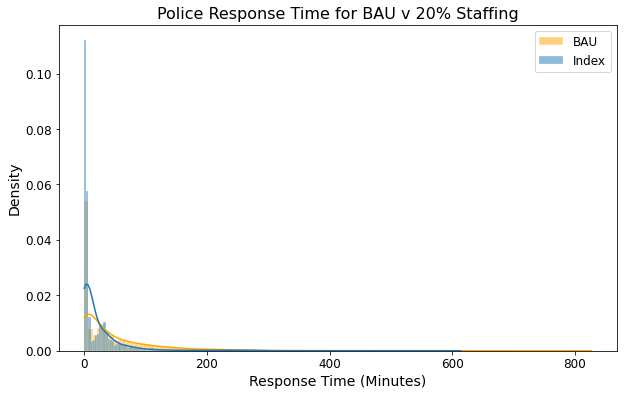

In [8]:
dist_plot(df,
          percentage1=0.2, #[0.1,0.2,..1.0]
          responder1='Police', #"Police","Alternative"
          index1='BAU', #"Index","Violent",'BAU'
          profile_type1="worst_case",#'worst_case','0.5','0.25','0.75',0.95
          label1='BAU',
          
          percentage2=0.2, #[0.1,0.2,..1.0]
          responder2='Police', #"Police","Alternative",'BAU'
          index2='Index',#"Index","Violent"
          profile_type2='worst_case',#'worst_case','0.5','0.25','0.75',0.95
          label2='Index',
          title='Police Response Time for BAU v 20% Staffing')

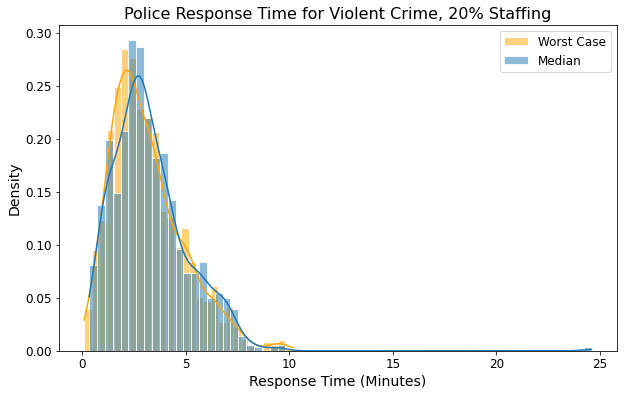

In [14]:
dist_plot(df,
          percentage1=0.5, #[0.1,0.2,..1.0]
          responder1='Police', #"Police","Alternative"
          index1='Violent', #"Index","Violent",'BAU'
          profile_type1="0.95",#'worst_case','0.5','0.25','0.75',0.95
          label1='Worst Case',
          percentage2=0.5, #[0.1,0.2,..1.0]
          responder2='Police', #"Police","Alternative"
          index2="Violent",#"Index","Violent",'BAU'
          profile_type2='0.5',#'worst_case','0.5','0.25','0.75',0.95
          label2='Median',
          title='Police Response Time for Violent Crime, 20% Staffing')

### Below is a function to create a line plot to RT over staffing levels
* You can select the type of aggreation for the response times (mean, max, median) for each daily scenarios and then you can select how/if these are aggregated over the days

In [10]:
def make_lineplot(metric='Mean',agg_type='mean',responder='Police'):
    
    df_index=df.query('Responder == @responder and Grouping== "Index"')
    df1=df_index.loc[[i for i in df_index.index if '0.5_' in i]] 
    df2=df_index.loc[[i for i in df_index.index if 'worst_case_' in i]] 

    df_violent=df.query('Responder == @responder and Grouping== "Violent"')
    df3=df_violent.loc[[i for i in df_violent.index if '0.5_' in i]] 
    df4=df_violent.loc[[i for i in df_violent.index if 'worst_case_' in i]] 
    
    if responder=='Police':
        df_BAU=df.query('Responder == "Police" and Grouping== "BAU"')
        df5=df_BAU.loc[[i for i in df_BAU.index if '0.5_' in i]] 
        df6=df_BAU.loc[[i for i in df_BAU.index if 'worst_case_' in i]] 

    plt.figure(figsize=(10,6))

    if agg_type=='None':
        sns.lineplot(df1['percentage'].values,df1[metric].values,label='Index,Median')
        sns.lineplot(df2['percentage'].values,df2[metric].values,label='Index,Worst Case')
        sns.lineplot(df3['percentage'].values,df3[metric].values,label='Violent,Median')
        sns.lineplot(df4['percentage'].values,df4[metric].values,label='Violent,Worst Case')
        sns.lineplot(df5['percentage'].values,df5[metric].values,label='BAU,Median')
        sns.lineplot(df6['percentage'].values,df6[metric].values,label='BAU,Worst Case')

    else:
        df1=df1[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df2=df2[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df3=df3[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df4=df4[[metric,'percentage']].groupby('percentage').agg(agg_type)
        
        sns.lineplot(df1.index,df1[metric].values,label='Index,Median')
        sns.lineplot(df2.index,df2[metric].values,label='Index,Worst Case')
        sns.lineplot(df3.index,df3[metric].values,label='Violent,Median')
        sns.lineplot(df4.index,df4[metric].values,label='Violent,Worst Case')


    plt.ylabel('Response Time (Minutes)',fontsize=14)
    plt.xlabel('% of BAU Staffing Levels',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title('Average '+responder+ ' Response Time',fontsize=16)
    plt.legend(fontsize=12);
    plt.savefig('Chicago_data/mean_Rt_4scenarios.png');

In [16]:
#do we want to group by index/ violent or worst_case/median
def make_lineplot_grouped(metric='Mean',agg_type='mean',responder='Police',day_type='median'):
    
    df_index=df.query('Responder == @responder and Grouping== "Index"')
    df_violent=df.query('Responder == @responder and Grouping== "Violent"')
    #if responder=='Police':
    df_BAU=df.query('Responder == "Police" and Grouping== "BAU"')
    
    if day_type=='median': 
        df1=df_index.loc[[i for i in df_index.index if '0.5_' in i]] 
        df3=df_violent.loc[[i for i in df_violent.index if '0.5_' in i]] 
        df5=df_BAU.loc[[i for i in df_BAU.index if '0.5_' in i]] 
        
    if day_type=='worst_case': 
        df1=df_index.loc[[i for i in df_index.index if 'worst_case_' in i]] 
        df3=df_violent.loc[[i for i in df_violent.index if 'worst_case_' in i]] 
        df5=df_BAU.loc[[i for i in df_BAU.index if 'worst_case_' in i]] 
        
    

    plt.figure(figsize=(10,6))

    if agg_type=='None':
        sns.lineplot(df1['percentage'].values,df1[metric].values,label='Index,Median')
        sns.lineplot(df3['percentage'].values,df3[metric].values,label='Violent,Median')
        sns.lineplot(df5['percentage'].values,df5[metric].values,label='BAU,Median')


    else:
        df1=df1[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df2=df2[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df3=df3[[metric,'percentage']].groupby('percentage').agg(agg_type)
        df4=df4[[metric,'percentage']].groupby('percentage').agg(agg_type)
        
        sns.lineplot(df1.index,df1[metric].values,label='Index,Median')
        sns.lineplot(df2.index,df2[metric].values,label='Index,Worst Case')
        sns.lineplot(df3.index,df3[metric].values,label='Violent,Median')
        sns.lineplot(df4.index,df4[metric].values,label='Violent,Worst Case')


    plt.ylabel('Response Time (Minutes)',fontsize=14)
    plt.xlabel('% of BAU Staffing Levels',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(metric+' '+responder+ ' Response Time for '+day_type+ ' Days',fontsize=16)
    plt.legend(fontsize=12);
    plt.savefig('Chicago_data/mean_Rt_4scenarios.png');

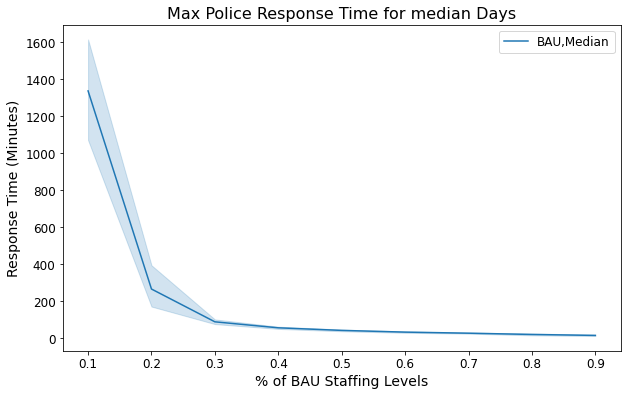

In [17]:
make_lineplot_grouped(metric='Max', #'Median','Mean','Max'
              agg_type='None', #'median','max','mean',none
              responder='Police')#Police,Alternative

No handles with labels found to put in legend.


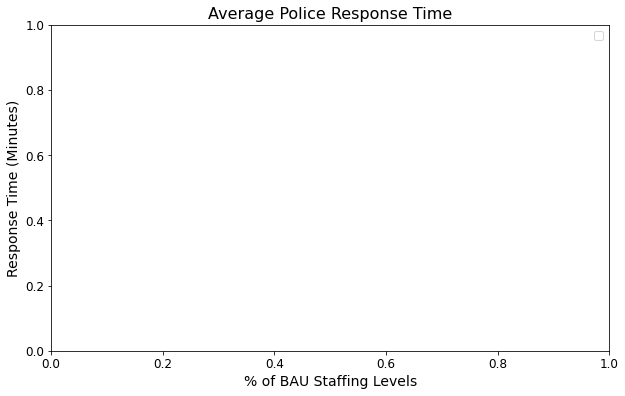

In [48]:
make_lineplot(metric='Median', #'Median','Mean','Max'
              agg_type='None', #'median','max','mean',none
              responder='Police')#Police,Alternative

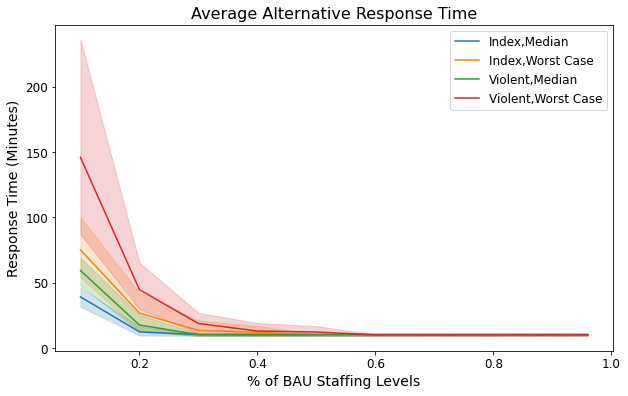

In [36]:
make_lineplot(metric='Max', #'Median','Mean','Max'
              agg_type='None', #'median','max','mean',none
              responder='Alternative')#Police,Alternative

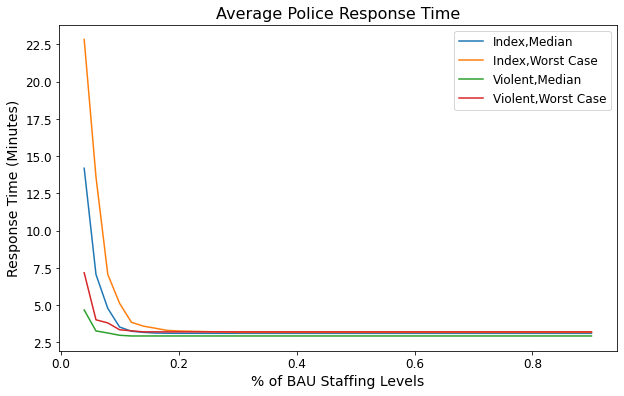

In [38]:
make_lineplot(metric='Mean', #'Median','Mean','Max'
              agg_type='mean', #'median','max','mean',none
              responder='Police')#Police,Alternative

### Below is a function to create a box plot  over staffing levels
* You can select the type of scenario you want to see and then look at the distribution of RTs over the staffing levels

In [11]:
def box_plot(df,responder1,index1,profile_type1):
    RTs={}
    

    df1=df.query('Responder == @responder1 and Grouping== @index1')
    df1=df1.loc[[i for i in df1.index if profile_type1+'_' in i]] 

        
    for j in df1.percentage.unique():
        RT_list=[]

        for i in df1.query('percentage == @j').index:

            res = json.loads(df1.loc[i,'RTs'])
            RT_list+=res
            
        RTs[j]=RT_list
    RT_df=pd.DataFrame(RTs)


    plt.figure(figsize=(10,6))
    sns.boxplot(data=RT_df)
    plt.ylabel('Response Time (Minutes)',fontsize=14)
    plt.xlabel('% of BAU Staffing Levels',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(responder1+' Response Time for '+index1+' Crime',fontsize=16);



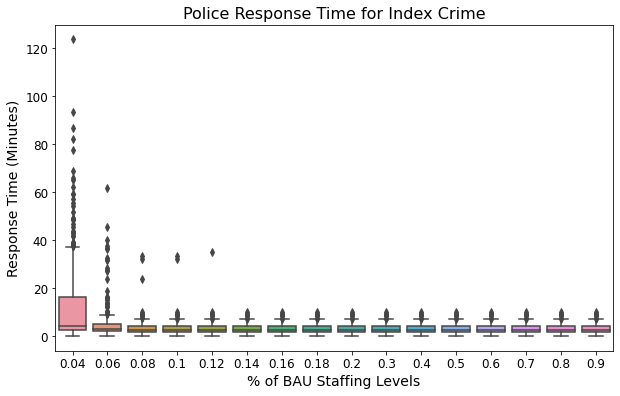

In [12]:
#I am concerned that the distributions are all the same --> it looks like there is only variance in the dist
#when the officers are maxed (IE there is a queue)
box_plot(df,
          responder1='Police', #"Police","Alternative"
          index1='Index', #"Index","Violent",'BAU'
          profile_type1="0.95")#'worst_case','0.5','0.25','0.75',0.95


In [21]:
df1=df.query('Responder == "Police" and Grouping== "Index"')
df1=df1.loc[[i for i in df1.index if '0.5_' in i]] 
df1.head()

,Mean,Median,Max,Officers Maxed,RTs,percentage,Responder,Grouping
Index_fall_0.5_0__0.1,3.224759,2.829574,29.465009,3,"[7.364370922241418, 5.706187567574286, 2.17047...",0.1,Police,Index
Index_fall_0.5_0__0.2,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.2,Police,Index
Index_fall_0.5_0__0.3,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.3,Police,Index
Index_fall_0.5_0__0.4,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.4,Police,Index
Index_fall_0.5_0__0.5,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.5,Police,Index
Index_fall_0.5_0__0.6,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.6,Police,Index
Index_fall_0.5_0__0.7,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.7,Police,Index
Index_fall_0.5_0__0.8,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.8,Police,Index
Index_fall_0.5_0__0.9,3.080666,2.818559,8.914607,0,"[7.364370922241418, 5.706187567574286, 2.17047...",0.9,Police,Index
Index_summer_0.5_0__0.1,3.396570,2.793536,36.504966,6,"[3.2178436501920045, 2.33454969117775, 2.69033...",0.1,Police,Index


In [23]:
df[df['Officers Maxed']>0] #only occurs for 10% occupancy

,Mean,Median,Max,Officers Maxed,RTs,percentage,Responder,Grouping
Index_fall_0.5_0__0.1,3.224759,2.829574,29.465009,3,"[7.364370922241418, 5.706187567574286, 2.17047...",0.1,Police,Index
nonIndex_fall_0.5_0__0.1,3.224759,2.829574,29.465009,3,"[7.364370922241418, 5.706187567574286, 2.17047...",0.1,Alternative,Index
Index_summer_worst_case_0__0.1,3.569079,3.033894,30.791728,8,"[4.228758683683995, 5.484260939267029, 2.54228...",0.1,Police,Index
nonIndex_summer_worst_case_0__0.1,3.569079,3.033894,30.791728,8,"[4.228758683683995, 5.484260939267029, 2.54228...",0.1,Alternative,Index
Index_spring_worst_case_0__0.1,3.103513,2.714234,10.745043,2,"[3.2322284911827213, 3.9210483179440025, 3.220...",0.1,Police,Index
nonIndex_spring_worst_case_0__0.1,3.103513,2.714234,10.745043,2,"[3.2322284911827213, 3.9210483179440025, 3.220...",0.1,Alternative,Index
Index_all_data_worst_case_0__0.1,4.065488,3.001904,57.593460,20,"[4.155655423962619, 1.3155510954801348, 1.7380...",0.1,Police,Index
nonIndex_all_data_worst_case_0__0.1,4.065488,3.001904,57.593460,20,"[4.155655423962619, 1.3155510954801348, 1.7380...",0.1,Alternative,Index
Index_summer_0.5_0__0.1,3.396570,2.793536,36.504966,6,"[3.2178436501920045, 2.33454969117775, 2.69033...",0.1,Police,Index
nonIndex_summer_0.5_0__0.1,3.396570,2.793536,36.504966,6,"[3.2178436501920045, 2.33454969117775, 2.69033...",0.1,Alternative,Index


In [22]:
df['District Officer Demand'][0]

"{'17': [(555.0, 3), (675.0, 2), (885.0, 2), (885.0, 4), (1255.0, 2), (1260.0, 3), (1350.0, 2), (1380.0, 5), (1382.0, 7)], '20': [(1020.0, 3), (1020.0, 5), (1200.0, 2), (1230.0, 5), (1260.0, 6)], '16': [(0.0, 3), (120.0, 3), (480.0, 2), (680.0, 2), (770.0, 2), (870.0, 2), (990.0, 2), (1050.0, 3), (1200.0, 3), (1260.0, 4), (1320.0, 4)], '19': [(150.0, 3), (510.0, 3), (540.0, 3), (860.0, 2), (870.0, 3), (900.0, 5), (910.0, 5), (960.0, 3), (971.0, 6), (1020.0, 4), (1020.0, 7), (1080.0, 5), (1350.0, 3), (1365.0, 5)], '25': [(415.0, 2), (465.0, 3), (540.0, 3), (660.0, 3), (830.0, 3), (840.0, 5), (980.0, 2), (1125.0, 2), (1200.0, 2), (1320.0, 3), (1410.0, 2)], '14': [(0.0, 3), (0.0, 6), (120.0, 6), (450.0, 3), (537.0, 2), (660.0, 2), (780.0, 2), (840.0, 4), (915.0, 2), (930.0, 4), (960.0, 5), (1020.0, 6), (1050.0, 7), (1170.0, 6), (1191.0, 7), (1220.0, 8), (1370.0, 5)], '22': [(120.0, 3), (420.0, 3), (1020.0, 3)], '5': [(405.0, 3), (600.0, 2), (600.0, 5), (720.0, 3), (780.0, 3), (788.0, 4), 

In [45]:
df['Tot. Officer Demand'][0]#['Time(min)']

"{'Time(min)': [0.0, 1.0, 5.0, 10.0, 11.0, 30.0, 48.0, 55.0, 60.0, 75.0, 90.0, 120.0, 130.0, 140.0, 141.0, 150.0, 160.0, 165.0, 175.0, 180.0, 210.0, 212.0, 240.0, 250.0, 255.0, 270.0, 285.0, 304.0, 310.0, 312.0, 315.0, 330.0, 337.0, 360.0, 420.0, 425.0, 451.0, 465.0, 480.0, 510.0, 540.0, 545.0, 555.0, 580.0, 600.0, 630.0, 640.0, 650.0, 651.0, 655.0, 660.0, 665.0, 670.0, 675.0, 690.0, 695.5833333333334, 697.0, 700.0, 714.0, 720.0, 721.0, 725.0, 730.0, 735.0, 750.0, 760.0, 764.0, 765.0, 770.0, 780.0, 796.0, 810.0, 818.0, 820.0, 825.0, 829.0, 840.0, 845.0, 850.0, 855.0, 870.0, 881.0, 900.0, 908.0, 915.0, 925.0, 945.0, 950.0, 960.0, 970.0, 975.0, 980.0, 985.0, 990.0, 1020.0, 1025.0, 1050.0, 1057.0, 1060.0, 1065.0, 1075.0, 1077.0, 1079.0, 1080.0, 1095.0, 1103.0, 1110.0, 1125.0, 1140.0, 1158.0, 1169.0, 1170.0, 1185.0, 1193.0, 1200.0, 1205.0, 1214.0, 1215.0, 1225.0, 1230.0, 1235.1, 1240.0, 1260.0, 1267.5333333333333, 1300.0, 1320.0, 1330.0, 1335.0, 1340.0, 1345.0, 1350.0, 1365.0, 1370.0, 1380

In [44]:
inp=df["Tot. Officer Demand"][0]
inp

"{'Time(min)': [0.0, 1.0, 5.0, 10.0, 11.0, 30.0, 48.0, 55.0, 60.0, 75.0, 90.0, 120.0, 130.0, 140.0, 141.0, 150.0, 160.0, 165.0, 175.0, 180.0, 210.0, 212.0, 240.0, 250.0, 255.0, 270.0, 285.0, 304.0, 310.0, 312.0, 315.0, 330.0, 337.0, 360.0, 420.0, 425.0, 451.0, 465.0, 480.0, 510.0, 540.0, 545.0, 555.0, 580.0, 600.0, 630.0, 640.0, 650.0, 651.0, 655.0, 660.0, 665.0, 670.0, 675.0, 690.0, 695.5833333333334, 697.0, 700.0, 714.0, 720.0, 721.0, 725.0, 730.0, 735.0, 750.0, 760.0, 764.0, 765.0, 770.0, 780.0, 796.0, 810.0, 818.0, 820.0, 825.0, 829.0, 840.0, 845.0, 850.0, 855.0, 870.0, 881.0, 900.0, 908.0, 915.0, 925.0, 945.0, 950.0, 960.0, 970.0, 975.0, 980.0, 985.0, 990.0, 1020.0, 1025.0, 1050.0, 1057.0, 1060.0, 1065.0, 1075.0, 1077.0, 1079.0, 1080.0, 1095.0, 1103.0, 1110.0, 1125.0, 1140.0, 1158.0, 1169.0, 1170.0, 1185.0, 1193.0, 1200.0, 1205.0, 1214.0, 1215.0, 1225.0, 1230.0, 1235.1, 1240.0, 1260.0, 1267.5333333333333, 1300.0, 1320.0, 1330.0, 1335.0, 1340.0, 1345.0, 1350.0, 1365.0, 1370.0, 1380

In [47]:
import json
convertedDict = json.loads(inp)
convertedDict

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [42]:
print(json.dumps(inp))

"{'Time(min)': [0.0, 1.0, 10.0, 15.0, 30.0, 36.0, 60.0, 90.0, 105.0, 120.0, 130.0, 150.0, 180.0, 185.0, 188.0, 210.0, 240.0, 265.0, 270.0, 275.0, 280.0, 300.0, 330.0, 360.0, 405.0, 415.0, 420.0, 449.0, 450.0, 465.0, 480.0, 490.0, 510.0, 525.0, 530.0, 537.0, 540.0, 555.0, 560.0, 565.0, 570.0, 580.0, 585.0, 600.0, 615.0, 630.0, 645.0, 650.0, 653.0, 660.0, 662.0, 672.0, 675.0, 680.0, 682.0, 690.0, 705.0, 710.0, 720.0, 723.0, 750.0, 765.0, 767.05, 770.0, 780.0, 788.0, 790.0, 793.0, 800.0, 810.0, 820.0, 825.0, 830.0, 833.0, 840.0, 845.0, 854.0, 855.0, 860.0, 870.0, 885.0, 886.0, 900.0, 910.0, 915.0, 930.0, 955.0, 960.0, 971.0, 980.0, 990.0, 994.0, 1000.0, 1005.0, 1020.0, 1022.0, 1050.0, 1055.0, 1065.0, 1080.0, 1092.0, 1095.0, 1098.0, 1110.0, 1115.0, 1125.0, 1135.0, 1140.0, 1170.0, 1191.0, 1195.0, 1200.0, 1212.0, 1215.0, 1220.0, 1227.0, 1230.0, 1235.0, 1255.0, 1260.0, 1290.0, 1299.0, 1305.0, 1310.0, 1320.0, 1328.0, 1335.0, 1350.0, 1365.0, 1370.0, 1380.0, 1382.0, 1392.0, 1395.0, 1410.0, 1430.